In [1]:
#filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
plt.style.use('ggplot')

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import seaborn as sns

# Note:
>  Before importing my data; 
> * I  converted the price column to int by removing the commas in the numbers.
> * I removed all balnk cells
> * I grouped all  house types bearing related names under one name

> All these were done using Excel

In [5]:
#fetch my data and get the first five rows
housing_df=pd.read_csv('HousingSEcleaned.csv')
housing_df.head()

,date_listed,Title,Location,State,Description,price
0,4/10/2022,3 bedroom flat bungalow,Liberty Estate,Enugu,3 Bedroom1 Bathroom detached bungalow,700000
1,4/10/2022,3 Bedroom Flat,Ziks Avenue,Enugu,1 Bathroom1 Toilet1 Parking Space900 sqm Total...,350000
2,3/31/2022,3 Bedroom Flat,Wtc Estate,Enugu,1 Bathroom1 Toilet1 Parking Space800 sqm Total...,700000
3,3/30/2022,3 Bedroom Flat,Sunrise Estate,Enugu,5 Bedrooms5 Bathrooms5 Toilets750 sqm Total Area,550000
4,3/28/2022,3 Bedroom Flat,Amorji Nike,Enugu,3 Bedrooms4 Bathrooms4 Toilets4 Parking Spaces,350000


In [6]:
housing_df.tail()


,date_listed,Title,Location,State,Description,price
138,NaN,3 Bedroom Flat,New Owerri,Imo,3 Bedroom Flat With 2 Toilets,360000
139,NaN,2 bedroom flat,Opposite Imo Housing New Owerri,Imo,2 Bedroom Flats,500000
140,NaN,3 Bedroom Flat,New Owerri,Imo,3 Bedroom Flat,2400000
141,NaN,3 Bedroom Flat,Owerri,Imo,Newly and Lovely Built 3 Bedroom Flat With Fed...,850000
142,NaN,3 bedroom flat Bungalow,Owerri,Imo,3 Bedroom Self Compound Bungalow,650000


In [7]:
#check for missing values
pd.DataFrame(housing_df.isnull().sum(), columns=['No of missing values'])


,No of missing values
date_listed,64
Title,0
Location,0
State,0
Description,32
price,0


In [8]:
#check data types
pd.DataFrame(housing_df.dtypes, columns=['Data Types'])          

,Data Types
date_listed,object
Title,object
Location,object
State,object
Description,object
price,int64


In [9]:
#we are going to drop the date_listed column since it has the most missing values
housing_df.drop('date_listed',axis=1,inplace = True) #Remember 1 signifys column


In [10]:
#check for unique values
pd.DataFrame(housing_df.nunique(dropna=True), columns=['No of Unique'])

,No of Unique
Title,16
Location,68
State,3
Description,42
price,43


In [11]:
#get the total number of houses listed for sale, in each state
pd.DataFrame(housing_df.State.value_counts())

,State
Enugu,77
Imo,34
Anambra,32


There is a total of 144 houses listed in my dataset. Enugu has the highest number of listed houses 

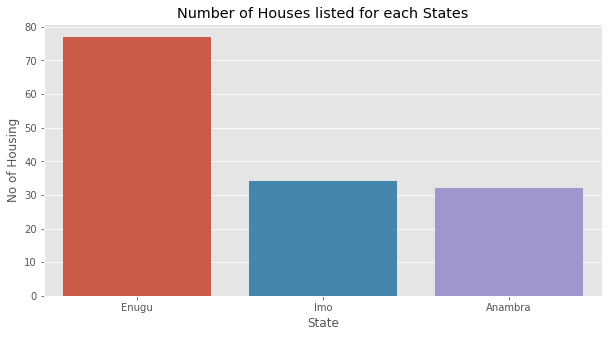

In [12]:
#vizualizing the number of Houses listed according to each State
plt.figure(figsize=(10, 5))
sns.countplot(housing_df['State'], data=housing_df)
plt.title('Number of Houses listed for each States')
plt.xlabel('State')
plt.ylabel('No of Housing');

In [14]:
pd.DataFrame(housing_df.Title.value_counts())
#pd.DataFrame(housing_df.nunique(dropna=True), columns=['No of Unique'])

,Title
3 Bedroom Flat,64
2 bedroom flat,23
1 bedroom flat,19
3 Bedroom Flat Duplex,7
3 Bedroom Flat bungalow,6
4 bedroom Duplex,6
Self contain,4
4 bedroom flat,4
3 Bedroom Flat,2
5 bedroom flat,2


In [17]:
#get the statiatical analysis
df =housing_df.describe()
describe= round(df, -5)
print(describe)


            price
count         0.0
mean    1700000.0
std     5900000.0
min      200000.0
25%      500000.0
50%      700000.0
75%      900000.0
max    50000000.0


The highest price value is at N50m

In [18]:
#get the house types with the highest price value
df=pd.pivot_table(housing_df, index='Title', values ='price')
x= round(df, -5)
print (x)


                               price
Title                               
1 bedroom flat              300000.0
2 bedroom flat             1400000.0
3 Bedroom Flat              800000.0
3 Bedroom Flat              900000.0
3 Bedroom Flat  bungalow    900000.0
3 Bedroom Flat Duplex      2000000.0
3 bedroom flat  Bungalow    600000.0
3 bedroom flat  bungalow    700000.0
4 bedroom  Duplex          1400000.0
4 bedroom flat             2000000.0
5 Bedroom Duplex           2500000.0
5 bedroom flat            50000000.0
A Stand Alone Duplex       1500000.0
Cool Clean Club House      5000000.0
Self contain                200000.0
Warehouse                  2500000.0


In [31]:
df = pd.pivot_table(housing_df, index=['Title','State'], values ='price')
x =  round(df, -1)
to_csv = x.to_csv
                
x.head(50)    

price
Title                    State              
1 bedroom flat           Anambra    355000.0
                         Enugu      266000.0
                         Imo        360000.0
2 bedroom flat           Anambra    880000.0
                         Enugu      725000.0
                         Imo       7550000.0
3 Bedroom Flat           Anambra   1587220.0
                         Enugu      651320.0
                         Imo        723530.0
3 Bedroom Flat           Enugu      925000.0
3 Bedroom Flat  bungalow Enugu      940000.0
                         Imo        700000.0
3 Bedroom Flat Duplex    Anambra    800000.0
                         Imo       2146670.0
3 bedroom flat  Bungalow Imo        650000.0
3 bedroom flat  bungalow Enugu      700000.0
4 bedroom  Duplex        Anambra   1800000.0
                         Enugu     1000000.0
                         Imo       1500000.0
4 bedroom flat           Enugu     2000000.0
5 Bedroom Duplex         Imo       2500000.0
5 bedroom flat           Enugu    50000000.0
A Stand Alone Duplex     Imo       1500000.0
Cool Clean Club House    Imo       5000000.0
Self contain             Enugu      210000.0
Warehouse                Enugu     2500000.0

## My Observations:
* I bedrooom Flat is more expensive in Imo than Enugu and Anambra. 
* Among the three states, Enugu pays the least rent for a 2 Bedroom flat 
* The rent of a 3 bedroom flat is more expensive in Anambra than Imo and Enugu, while the rent paid for 3 bedroom bungalows is higher than a 3 bedroom flat in Enugu but less for Imo 
* Anambra state residents pay more for a  four bedroom duplex, followed closely by Imo and then Enugu 